In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import sklearn

In [5]:
import seaborn as sns

# Heart Disease Project

In [6]:
df1 = pd.read_csv("heart-disease.csv")

The Following Table Shows Some Initial Data on Heart Disease Patients

In [7]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:>

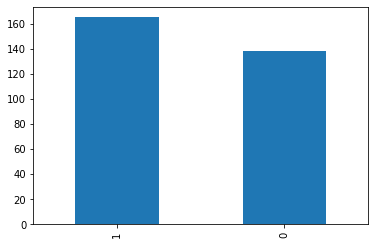

In [9]:
df1.target.value_counts().plot(kind="bar")

![](/Users/chrisgaughan/Downloads/6-step-ml-framework.png)

![](6-step-ml-framework.png)

# 1 Problem Definition
Predict Heart Disease

This is we're the data we're using 

In [10]:
ls 

6-step-ml-framework.png             car-sales.csv
Udemy_ML_Class_Heart_Disease.ipynb  car_sales_missing_dropped.csv
Udemy_Pandas.ipynb                  env/
Udemy_ml_9_25_21.ipynb              exported-car-sales.csv
car-sales-missing-data.csv          heart-disease.csv
car-sales-missing-dropped.csv


# Introduction to Pandas

In [11]:
# 2 main data types
series = pd.Series(["BMW", "Toyota", "Honda"])

In [12]:
series

0       BMW
1    Toyota
2     Honda
dtype: object

# series = 1-dimensional

In [13]:
colors = (["Red", "Blue", "White"])

In [14]:
colors

['Red', 'Blue', 'White']

# Dataframe = >1-dimensions, i.e. it will have many columns

In [116]:
# let's make a dataframe which is a dictionary
car_data = pd.DataFrame({"Car Make": series, "Color": colors})

In [16]:
car_data

,Car Make,Color
0,BMW,Red
1,Toyota,Blue
2,Honda,White


In [17]:
#Import Data
car_sales = pd.read_csv("car-sales.csv")

In [18]:
car_sales.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


# Exporting a dataframe

In [19]:
car_sales.to_csv("exported-car-sales.csv") # note this could have been exported to many data types

In [20]:
exported_car_sales = pd.read_csv("exported-car-sales.csv")

### OK- so notice in the above we have 2 indices instead of one. Here is what you must do to not have this happen

In [21]:
car_sales.to_csv("exported-car-sales.csv", index = False) #This fixes it

In [22]:
exported_car_sales = pd.read_csv("exported-car-sales.csv")

In [23]:
exported_car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


## Describe Data

In [24]:
# Attribute
car_sales.dtypes

# Function
# car_sales.to_csv()

# NOTE below that we are getting column names

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [25]:
car_sales.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [26]:
 # let's store the column names as a list
car_columns = car_sales.columns
car_columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [27]:
car_sales.index

RangeIndex(start=0, stop=10, step=1)

In [28]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [29]:
car_sales.describe()

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


# Note: describe only works on numeric columns- therefore- the price isn't shown here because its data type is an obj

In [30]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [31]:
car_sales.mean()

Odometer (KM)    78601.4
Doors                4.0
dtype: float64

In [32]:
# lets make up some data to show mean function
car_prices = pd.Series([1500, 2200, 4000])
car_prices.mean()

2566.6666666666665

In [33]:
car_sales.sum()

Make             ToyotaHondaToyotaBMWNissanToyotaHondaHondaToyo...
Colour               WhiteRedBlueBlackWhiteGreenBlueBlueWhiteWhite
Odometer (KM)                                               786014
Doors                                                           40
Price            $4,000.00$5,000.00$7,000.00$22,000.00$3,500.00...
dtype: object

In [34]:
car_sales["Doors"].sum()

40

In [35]:
car_sales["Doors"].median()

4.0

In [36]:
car_sales["Odometer (KM)"].mean()

78601.4

In [37]:
len(car_sales)

10

## Viewing and Selecting Data

In [38]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [39]:
car_sales.tail()

,Make,Colour,Odometer (KM),Doors,Price
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [40]:
# loc and iloc
animals = pd.Series(["cat", "Panda", "Snake", "Wolf"],
                   index = [0, 4, 2, 3]) # here I'm just changing the order in which the series is printed

In [41]:
animals

0      cat
4    Panda
2    Snake
3     Wolf
dtype: object

In [42]:
animals.loc[3] # so the loc refers to the index number (as opposed to the positiom number)

'Wolf'

In [43]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [44]:
car_sales.loc[3]

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

# iloc- refers to position

In [45]:
animals.iloc[3]

'Wolf'

In [46]:
car_sales.iloc[3]

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

In [47]:
animals.iloc[:3]

0      cat
4    Panda
2    Snake
dtype: object

In [48]:
animals.loc[:3]

0      cat
4    Panda
2    Snake
3     Wolf
dtype: object

In [49]:
car_sales.loc[:3]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"


In [50]:
car_sales.iloc[:3] # so it follows the indexing rules where the last element isn't included (e.)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"


In [51]:
car_sales["Make"]

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [52]:
car_sales["Colour"]

0    White
1      Red
2     Blue
3    Black
4    White
5    Green
6     Blue
7     Blue
8    White
9    White
Name: Colour, dtype: object

# Notice that you can use the parentheses and the dot notation interchangably

In [53]:
car_sales["Make"]

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [54]:
car_sales.Make

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [55]:
car_sales[car_sales["Make"] == "Toyota"] # only get the Toyota's

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
5,Toyota,Green,99213,4,"$4,500.00"
8,Toyota,White,60000,4,"$6,250.00"


In [56]:
car_sales[car_sales["Odometer (KM)"] > 100000]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [57]:
pd.crosstab(car_sales["Make"], car_sales["Doors"]) # make cross-comparisons 2 columns

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


In [58]:
car_sales.groupby(["Make"]).mean() # group's the dataframe on the make's mean OD and mean # of doors

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


<AxesSubplot:>

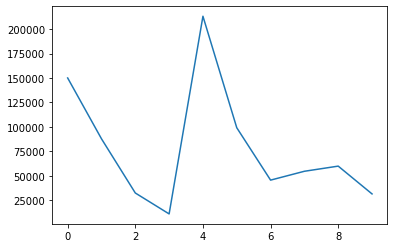

In [59]:
car_sales["Odometer (KM)"].plot()

In [60]:
dict = {"a":1, "b":2, "c":3, "d":4}

### dict["a"] ### So the data frames are dictionaries where you are dictionaries wherein you are obtaining the value
### So the columns are the values of the dictionary

<AxesSubplot:>

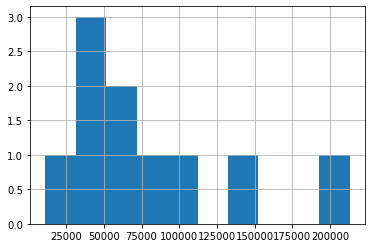

In [61]:
car_sales["Odometer (KM)"].hist()

In [62]:
#car_sales['Price'] = car_sales['Price'].str.replace(',', '')
#car_sales['Price'] = car_sales['Price'].str.replace('$', '')
#float(number_string.replace(',', '').replace('$', ''))
print(type("Price"))

<class 'str'>


In [63]:
# get rid of cents with this code as well
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,]|\.\d*', '').astype(int)

<ipython-input-63-5b1cf12bfe96>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales["Price"] = car_sales["Price"].str.replace('[\$\,]|\.\d*', '').astype(int)


In [64]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [65]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 528.0+ bytes


<AxesSubplot:>

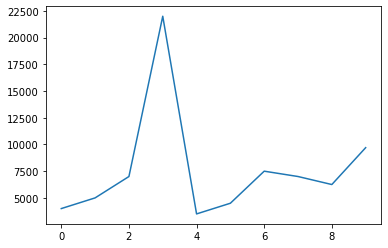

In [66]:
car_sales["Price"].plot()

## Maipulating Data With Pandas

In [67]:
car_sales["Make"].str.lower()

0    toyota
1     honda
2    toyota
3       bmw
4    nissan
5    toyota
6     honda
7     honda
8    toyota
9    nissan
Name: Make, dtype: object

In [68]:
car_sales #notice the string lowering isn't permanent

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [69]:
# Remember, if you want to make a lasting change to a column you have to reassign the data
# or you have to use the 'inplace' parameter
car_sales["Make"] = car_sales["Make"].str.lower()

In [70]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,toyota,White,150043,4,4000
1,honda,Red,87899,4,5000
2,toyota,Blue,32549,3,7000
3,bmw,Black,11179,5,22000
4,nissan,White,213095,4,3500
5,toyota,Green,99213,4,4500
6,honda,Blue,45698,4,7500
7,honda,Blue,54738,4,7000
8,toyota,White,60000,4,6250
9,nissan,White,31600,4,9700


# Dealing with missing data 

In [71]:
car_sales_missing = pd.read_csv("car-sales-missing-data.csv")

In [72]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [73]:
car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean(),
                                    inplace = True)

In [74]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,NaN,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,NaN
8,Toyota,White,60000.000000,NaN,NaN
9,NaN,White,31600.000000,4.0,"$9,700"


In [75]:
# now let's say we want to just get rid of the rows that have NaN
car_sales_missing.dropna(inplace = True)

In [76]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"


In [77]:
# we can also do
car_sales_missing_dropped = car_sales_missing.dropna()

In [78]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"


In [79]:
car_sales_missing_dropped

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"


In [80]:
# save to csv for some reason
car_sales_missing_dropped.to_csv("car-sales-missing-dropped.csv")

# Create data from missing data

In [81]:
# from series
seats_column = pd.Series([5,5,5,5,5])

# New column called seats
car_sales["Seats"] = seats_column

In [82]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,toyota,White,150043,4,4000,5.0
1,honda,Red,87899,4,5000,5.0
2,toyota,Blue,32549,3,7000,5.0
3,bmw,Black,11179,5,22000,5.0
4,nissan,White,213095,4,3500,5.0
5,toyota,Green,99213,4,4500,NaN
6,honda,Blue,45698,4,7500,NaN
7,honda,Blue,54738,4,7000,NaN
8,toyota,White,60000,4,6250,NaN
9,nissan,White,31600,4,9700,NaN


In [83]:
# Now we can fill in the NaN
car_sales["Seats"].fillna(5, inplace =True)

In [84]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,toyota,White,150043,4,4000,5.0
1,honda,Red,87899,4,5000,5.0
2,toyota,Blue,32549,3,7000,5.0
3,bmw,Black,11179,5,22000,5.0
4,nissan,White,213095,4,3500,5.0
5,toyota,Green,99213,4,4500,5.0
6,honda,Blue,45698,4,7500,5.0
7,honda,Blue,54738,4,7000,5.0
8,toyota,White,60000,4,6250,5.0
9,nissan,White,31600,4,9700,5.0


In [85]:
#Column from Python list
fuel_economy = [7.5, 8.6, 9.2, 10, 5, 7.8, 9, 12, 12, 14]

In [86]:
car_sales["Fuel Economy per 100KM"] = fuel_economy

In [87]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel Economy per 100KM
0,toyota,White,150043,4,4000,5.0,7.5
1,honda,Red,87899,4,5000,5.0,8.6
2,toyota,Blue,32549,3,7000,5.0,9.2
3,bmw,Black,11179,5,22000,5.0,10.0
4,nissan,White,213095,4,3500,5.0,5.0
5,toyota,Green,99213,4,4500,5.0,7.8
6,honda,Blue,45698,4,7500,5.0,9.0
7,honda,Blue,54738,4,7000,5.0,12.0
8,toyota,White,60000,4,6250,5.0,12.0
9,nissan,White,31600,4,9700,5.0,14.0


In [88]:
car_sales["Total fuel consumption (L)"] = car_sales["Odometer (KM)"]/100 * car_sales["Fuel Economy per 100KM"]

In [89]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel Economy per 100KM,Total fuel consumption (L)
0,toyota,White,150043,4,4000,5.0,7.5,11253.225
1,honda,Red,87899,4,5000,5.0,8.6,7559.314
2,toyota,Blue,32549,3,7000,5.0,9.2,2994.508
3,bmw,Black,11179,5,22000,5.0,10.0,1117.900
4,nissan,White,213095,4,3500,5.0,5.0,10654.750
5,toyota,Green,99213,4,4500,5.0,7.8,7738.614
6,honda,Blue,45698,4,7500,5.0,9.0,4112.820
7,honda,Blue,54738,4,7000,5.0,12.0,6568.560
8,toyota,White,60000,4,6250,5.0,12.0,7200.000
9,nissan,White,31600,4,9700,5.0,14.0,4424.000


In [90]:
# Create a column from a single value
car_sales["Number Of Wheels"] = 4

In [91]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel Economy per 100KM,Total fuel consumption (L),Number Of Wheels
0,toyota,White,150043,4,4000,5.0,7.5,11253.225,4
1,honda,Red,87899,4,5000,5.0,8.6,7559.314,4
2,toyota,Blue,32549,3,7000,5.0,9.2,2994.508,4
3,bmw,Black,11179,5,22000,5.0,10.0,1117.900,4
4,nissan,White,213095,4,3500,5.0,5.0,10654.750,4
5,toyota,Green,99213,4,4500,5.0,7.8,7738.614,4
6,honda,Blue,45698,4,7500,5.0,9.0,4112.820,4
7,honda,Blue,54738,4,7000,5.0,12.0,6568.560,4
8,toyota,White,60000,4,6250,5.0,12.0,7200.000,4
9,nissan,White,31600,4,9700,5.0,14.0,4424.000,4


In [92]:
car_sales["Passed emissions"] = True

In [93]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel Economy per 100KM,Total fuel consumption (L),Number Of Wheels,Passed emissions
0,toyota,White,150043,4,4000,5.0,7.5,11253.225,4,True
1,honda,Red,87899,4,5000,5.0,8.6,7559.314,4,True
2,toyota,Blue,32549,3,7000,5.0,9.2,2994.508,4,True
3,bmw,Black,11179,5,22000,5.0,10.0,1117.900,4,True
4,nissan,White,213095,4,3500,5.0,5.0,10654.750,4,True
5,toyota,Green,99213,4,4500,5.0,7.8,7738.614,4,True
6,honda,Blue,45698,4,7500,5.0,9.0,4112.820,4,True
7,honda,Blue,54738,4,7000,5.0,12.0,6568.560,4,True
8,toyota,White,60000,4,6250,5.0,12.0,7200.000,4,True
9,nissan,White,31600,4,9700,5.0,14.0,4424.000,4,True


In [94]:
car_sales.dtypes

Make                           object
Colour                         object
Odometer (KM)                   int64
Doors                           int64
Price                           int64
Seats                         float64
Fuel Economy per 100KM        float64
Total fuel consumption (L)    float64
Number Of Wheels                int64
Passed emissions                 bool
dtype: object

# Remove Column

In [95]:
car_sales = car_sales.drop("Total fuel consumption (L)", axis = 1)

In [101]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel Economy per 100KM,Number Of Wheels,Passed emissions
0,toyota,White,150043,4,4000,5.0,7.5,4,True
1,honda,Red,87899,4,5000,5.0,8.6,4,True
2,toyota,Blue,32549,3,7000,5.0,9.2,4,True
3,bmw,Black,11179,5,22000,5.0,10.0,4,True
4,nissan,White,213095,4,3500,5.0,5.0,4,True
5,toyota,Green,99213,4,4500,5.0,7.8,4,True
6,honda,Blue,45698,4,7500,5.0,9.0,4,True
7,honda,Blue,54738,4,7000,5.0,12.0,4,True
8,toyota,White,60000,4,6250,5.0,12.0,4,True
9,nissan,White,31600,4,9700,5.0,14.0,4,True


# Shuffle Data Frame to Randomize Values for Data Analysis

In [103]:
car_sales_shuffled = car_sales.sample(frac=1)

In [104]:
car_sales_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel Economy per 100KM,Number Of Wheels,Passed emissions
4,nissan,White,213095,4,3500,5.0,5.0,4,True
0,toyota,White,150043,4,4000,5.0,7.5,4,True
7,honda,Blue,54738,4,7000,5.0,12.0,4,True
2,toyota,Blue,32549,3,7000,5.0,9.2,4,True
3,bmw,Black,11179,5,22000,5.0,10.0,4,True
1,honda,Red,87899,4,5000,5.0,8.6,4,True
8,toyota,White,60000,4,6250,5.0,12.0,4,True
9,nissan,White,31600,4,9700,5.0,14.0,4,True
5,toyota,Green,99213,4,4500,5.0,7.8,4,True
6,honda,Blue,45698,4,7500,5.0,9.0,4,True


In [105]:
# say you have a shit-ton of data and you want to just practice on 20% of the data
car_sales_shuffled.sample(frac=0.2)

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel Economy per 100KM,Number Of Wheels,Passed emissions
0,toyota,White,150043,4,4000,5.0,7.5,4,True
3,bmw,Black,11179,5,22000,5.0,10.0,4,True


In [106]:
car_sales_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel Economy per 100KM,Number Of Wheels,Passed emissions
4,nissan,White,213095,4,3500,5.0,5.0,4,True
0,toyota,White,150043,4,4000,5.0,7.5,4,True
7,honda,Blue,54738,4,7000,5.0,12.0,4,True
2,toyota,Blue,32549,3,7000,5.0,9.2,4,True
3,bmw,Black,11179,5,22000,5.0,10.0,4,True
1,honda,Red,87899,4,5000,5.0,8.6,4,True
8,toyota,White,60000,4,6250,5.0,12.0,4,True
9,nissan,White,31600,4,9700,5.0,14.0,4,True
5,toyota,Green,99213,4,4500,5.0,7.8,4,True
6,honda,Blue,45698,4,7500,5.0,9.0,4,True


In [107]:
#How would we get the data back into order?
car_sales_shuffled.reset_index() #Problem this will produce two indeces as per below

,index,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel Economy per 100KM,Number Of Wheels,Passed emissions
0,4,nissan,White,213095,4,3500,5.0,5.0,4,True
1,0,toyota,White,150043,4,4000,5.0,7.5,4,True
2,7,honda,Blue,54738,4,7000,5.0,12.0,4,True
3,2,toyota,Blue,32549,3,7000,5.0,9.2,4,True
4,3,bmw,Black,11179,5,22000,5.0,10.0,4,True
5,1,honda,Red,87899,4,5000,5.0,8.6,4,True
6,8,toyota,White,60000,4,6250,5.0,12.0,4,True
7,9,nissan,White,31600,4,9700,5.0,14.0,4,True
8,5,toyota,Green,99213,4,4500,5.0,7.8,4,True
9,6,honda,Blue,45698,4,7500,5.0,9.0,4,True


In [108]:
#This is how to do it properly
car_sales_shuffled.reset_index(inplace = True, drop = True)

In [109]:
car_sales_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel Economy per 100KM,Number Of Wheels,Passed emissions
0,nissan,White,213095,4,3500,5.0,5.0,4,True
1,toyota,White,150043,4,4000,5.0,7.5,4,True
2,honda,Blue,54738,4,7000,5.0,12.0,4,True
3,toyota,Blue,32549,3,7000,5.0,9.2,4,True
4,bmw,Black,11179,5,22000,5.0,10.0,4,True
5,honda,Red,87899,4,5000,5.0,8.6,4,True
6,toyota,White,60000,4,6250,5.0,12.0,4,True
7,nissan,White,31600,4,9700,5.0,14.0,4,True
8,toyota,Green,99213,4,4500,5.0,7.8,4,True
9,honda,Blue,45698,4,7500,5.0,9.0,4,True


# apply a function to a column: lambda function

In [110]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel Economy per 100KM,Number Of Wheels,Passed emissions
0,toyota,White,150043,4,4000,5.0,7.5,4,True
1,honda,Red,87899,4,5000,5.0,8.6,4,True
2,toyota,Blue,32549,3,7000,5.0,9.2,4,True
3,bmw,Black,11179,5,22000,5.0,10.0,4,True
4,nissan,White,213095,4,3500,5.0,5.0,4,True
5,toyota,Green,99213,4,4500,5.0,7.8,4,True
6,honda,Blue,45698,4,7500,5.0,9.0,4,True
7,honda,Blue,54738,4,7000,5.0,12.0,4,True
8,toyota,White,60000,4,6250,5.0,12.0,4,True
9,nissan,White,31600,4,9700,5.0,14.0,4,True


In [111]:
# Convert odometer to miles
car_sales["Odometer (KM)"] = car_sales["Odometer (KM)"].apply(lambda x: x/1.6)

In [112]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel Economy per 100KM,Number Of Wheels,Passed emissions
0,toyota,White,93776.875,4,4000,5.0,7.5,4,True
1,honda,Red,54936.875,4,5000,5.0,8.6,4,True
2,toyota,Blue,20343.125,3,7000,5.0,9.2,4,True
3,bmw,Black,6986.875,5,22000,5.0,10.0,4,True
4,nissan,White,133184.375,4,3500,5.0,5.0,4,True
5,toyota,Green,62008.125,4,4500,5.0,7.8,4,True
6,honda,Blue,28561.250,4,7500,5.0,9.0,4,True
7,honda,Blue,34211.250,4,7000,5.0,12.0,4,True
8,toyota,White,37500.000,4,6250,5.0,12.0,4,True
9,nissan,White,19750.000,4,9700,5.0,14.0,4,True


In [114]:
car_sales = car_sales.rename(columns={'Odometer (KM)': 'Odometer (Miles)'})

In [115]:
car_sales

,Make,Colour,Odometer (Miles),Doors,Price,Seats,Fuel Economy per 100KM,Number Of Wheels,Passed emissions
0,toyota,White,93776.875,4,4000,5.0,7.5,4,True
1,honda,Red,54936.875,4,5000,5.0,8.6,4,True
2,toyota,Blue,20343.125,3,7000,5.0,9.2,4,True
3,bmw,Black,6986.875,5,22000,5.0,10.0,4,True
4,nissan,White,133184.375,4,3500,5.0,5.0,4,True
5,toyota,Green,62008.125,4,4500,5.0,7.8,4,True
6,honda,Blue,28561.250,4,7500,5.0,9.0,4,True
7,honda,Blue,34211.250,4,7000,5.0,12.0,4,True
8,toyota,White,37500.000,4,6250,5.0,12.0,4,True
9,nissan,White,19750.000,4,9700,5.0,14.0,4,True
